Importing all required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from zipfile import ZipFile
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from keras.utils import to_categorical

Setting up GPUs

In [ ]:
#GPU setting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Import os to set the environment variable CUDA_VISIBLE_DEVICES
import os
# Set CUDA_DEVICE_ORDER so the IDs assigned by CUDA match those from nvidia-smi
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# Set CUDA_VISIBLE_DEVICES to mask out all other GPUs than the first available device id
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


loading the dataset from csv file

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/labels/train_subset0.csv')    # reading the csv file
train=train[0:5000]
train.head() 

,Filename,Label
0,20171109-175921-2.jpg,5
1,20170714-142019-3.jpg,1
2,20170718-101402-2.jpg,0
3,20170126-095456-0.jpg,1
4,20170913-110647-1.jpg,3


In [ ]:
test.shape

(3507, 2)

In [ ]:
train['Species']

0       Chinee apple
1       Chinee apple
2       Chinee apple
3       Chinee apple
4       Chinee apple
            ...     
4995      Parthenium
4996      Parthenium
4997     Rubber vine
4998      Parthenium
4999      Parthenium
Name: Species, Length: 5000, dtype: object

In [ ]:
train['Species'].unique()

array(['Chinee apple', 'Lantana', 'Negative', 'Snake weed', 'Siam weed',
       'Prickly acacia', 'Parthenium', 'Rubber vine'], dtype=object)

loading images from google drive

In [ ]:
with ZipFile('/content/drive/MyDrive/images.zip', "r") as f: f.extractall('/content/images')
print("Finished unzipping images.")

Finished unzipping images.


In [ ]:
train.columns

Index(['Filename', 'Label', 'Species'], dtype='object')

In [ ]:
train['Filename'][1]

'20160928-140337-0.jpg'

preprocess images and appending them with filename

In [ ]:
images = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/images/'+train['Filename'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    images.append(img)
X = np.array(images)
#('/content/images'+train['Filename'][i],target_size=(224,224,3))

100%|██████████| 5000/5000 [00:09<00:00, 534.33it/s]


seperating labels in new dataframe

In [ ]:
y=train['Label'].values
#y = to_categorical(y)

cheking the appended image

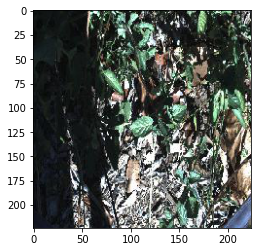

In [ ]:
plt.imshow(X[70])

giving class names to labels

In [ ]:
class_names = ['Chinee Apple',
               'Lantana',
               'Parkinsonia',
               'Parthenium',
               'Prickly Acacia',
               'Rubber Vine',
               'Siam Weed',
               'Snake Weed',
               'Negatives']

splitting dataset into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

checking the training dataset with filename

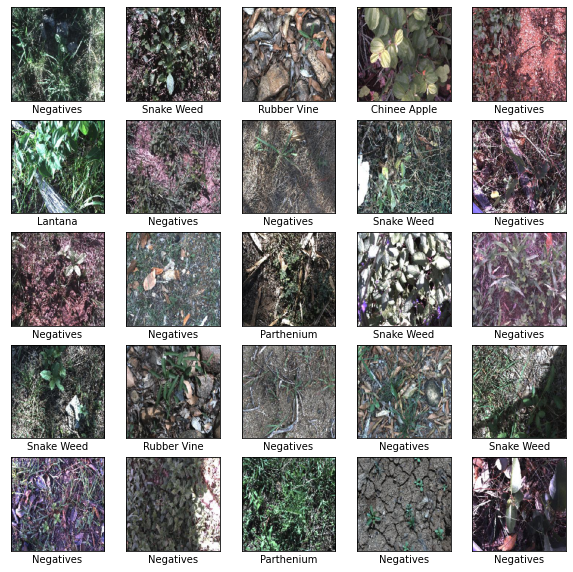

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()


training the model using cnn 

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

Layers of CNN

In [ ]:
model  = keras.Sequential([
    keras.layers.Flatten(input_shape=(224,224,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

compiling model using adam optimizer on accuracy metrics

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fitting models on 60 epochs and 256 batch size

In [ ]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/60
18/18 [==============================] - 5s 106ms/step - loss: 62.6658 - accuracy: 0.3833 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 2/60
18/18 [==============================] - 2s 87ms/step - loss: 73.9956 - accuracy: 0.5382 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 3/60
18/18 [==============================] - 2s 86ms/step - loss: 73.5984 - accuracy: 0.5290 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 4/60
18/18 [==============================] - 2s 85ms/step - loss: 73.7049 - accuracy: 0.5290 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 5/60
18/18 [==============================] - 2s 88ms/step - loss: 73.7834 - accuracy: 0.5262 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 6/60
18/18 [==============================] - 2s 86ms/step - loss: 73.8098 - accuracy: 0.5332 - val_loss: 75.0028 - val_accuracy: 0.5320
Epoch 7/60
18/18 [==============================] - 2s 85ms/step - loss: 73.4753 - accuracy: 0.5299 - val_loss: 75.0028 - val_accuracy: 0.532

printing accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

16/16 [==============================] - 0s 10ms/step - loss: 75.0028 - accuracy: 0.5320
Test Accuracy: 0.5320000052452087


In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.argmax(predictions[0])

8

In [ ]:
y_test[0]

6

Function for predicting the images with correct labels

In [ ]:
def plot_image(i, prediction_array, true_label, img):
  prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_labels = np.argmax(prediction_array)
  if predicted_labels == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_labels], 100*np.max(prediction_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, prediction_array, true_label):
  prediction_array, true_label = prediction_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_array, color='#777777')
  plt.ylim([0,1])
  predicted_labels = np.argmax(prediction_array)

  thisplot[predicted_labels].set_color('red')
  thisplot[true_label].set_color('green')

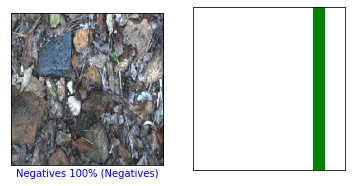

In [ ]:
i=8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

saving model

In [ ]:
# Save the entire model as a SavedModel.
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


loading the save model

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")


Performing prediction on saved model

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()
